In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *

/home/bluefog/miniconda3/envs/bf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<font color=blue>数据分布：均匀分布&大异质性</font>

<font color=blue>矩阵性质：完全联通&稀疏矩阵</font>

<font color=red>四个组合，分别看Pull Sum和Pull Diag在最优学习率下的表现</font>

### 均匀分布的数据&稀疏矩阵

<font color=red>两层神经网络</font> 

<font color=blue>Pull Diag 最优参数：4.5e-2 / 5 到 5e-2 / 5  </font>

<font color=blue>Pull Sum 最优参数：0.2 到 0.4 </font>

此时，收敛速度的差异并不大，正确率上界Sum要高一点

In [10]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()

A的第二大特征值: 0.5886189049139585
A的beta: 0.9210395218629739
A的spectral gap: 0.07896047813702611
A的kappa: 1.8348604358048797
S_A是: 91.01491565631535 

1.7891e+00, 1.9068e+06


Training Progress:   0%|          | 8/2000 [00:00<00:52, 38.23it/s, accuracy=11.8300000000%, epoch=10, loss=2474999516.8000001907]

Training Progress: 100%|██████████| 2000/2000 [00:50<00:00, 39.70it/s, accuracy=88.0800000000%, epoch=2000, loss=745331.7656250000] 


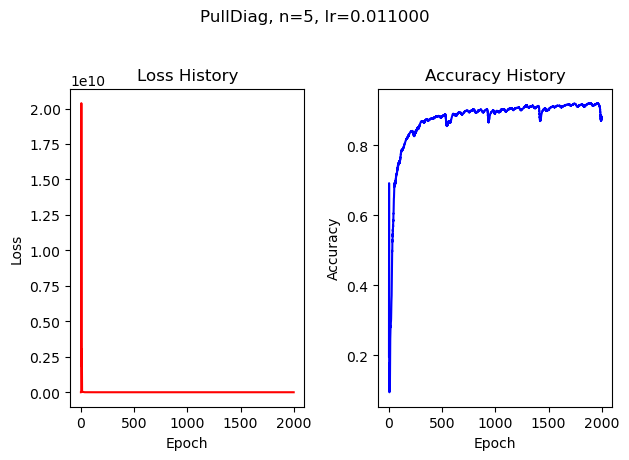

In [11]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(5.5e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   3%|▎         | 64/2000 [00:01<00:46, 41.93it/s, accuracy=85.5500000000%, epoch=64, loss=0.9321027756]

Training Progress: 100%|██████████| 2000/2000 [00:49<00:00, 40.38it/s, accuracy=96.7700000000%, epoch=2000, loss=0.1489798546]


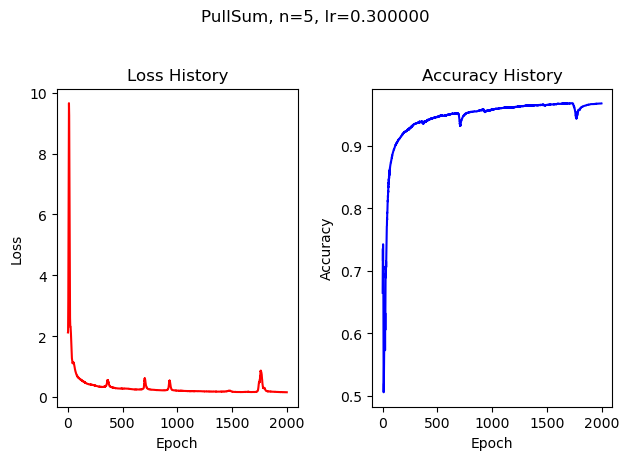

In [12]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(0.3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

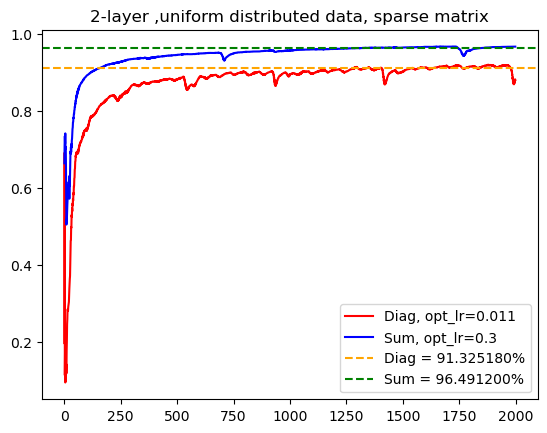

In [13]:
plt.plot(A1,color='r',label='Diag, opt_lr=0.011')
plt.plot(a1,color='b',label='Sum, opt_lr=0.3')
plt.title("2-layer ,uniform distributed data, sparse matrix")
number=np.mean(A1[1500:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a1[1500:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')
plt.legend()
plt.show()

### 均匀分布的数据&稀疏矩阵

<font color=red>四层神经网络</font> 

<font color=blue>Pull Diag 最优参数：1e-2/5 </font>

<font color=blue>Pull Sum 最优参数：0.1 到 0.2 </font>

此时，收敛速度的差异变大了一些（没快多少），正确率上界Sum要高一点

In [2]:
n=5
a=0.97
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
A=a*A+(1-a)*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard_shuffled()

A的第二大特征值: 0.579810336653947
A的beta: 0.9086060481673253
A的spectral gap: 0.09139395183267474
A的kappa: 1.8348604358048801
S_A是: 78.63300703947077 

1.7815e+00, 1.8482e+04


Training Progress:   2%|▏         | 48/2000 [00:02<01:45, 18.54it/s, accuracy=46.2600000000%, epoch=49, loss=1.8302055359]

Training Progress: 100%|██████████| 2000/2000 [01:46<00:00, 18.80it/s, accuracy=94.7800000000%, epoch=2000, loss=0.4055657148]


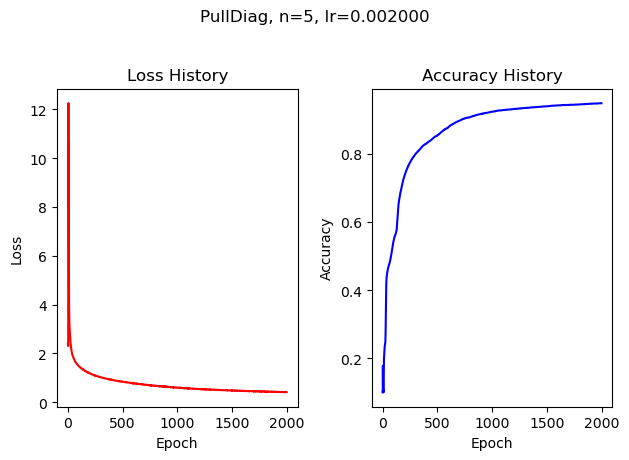

In [3]:
L2,A2=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_4layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(1e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   1%|          | 12/2000 [00:00<01:44, 18.98it/s, accuracy=69.8400000000%, epoch=12, loss=2.1801081657]

Training Progress: 100%|██████████| 2000/2000 [01:44<00:00, 19.06it/s, accuracy=97.5000000000%, epoch=2000, loss=0.1679232687]


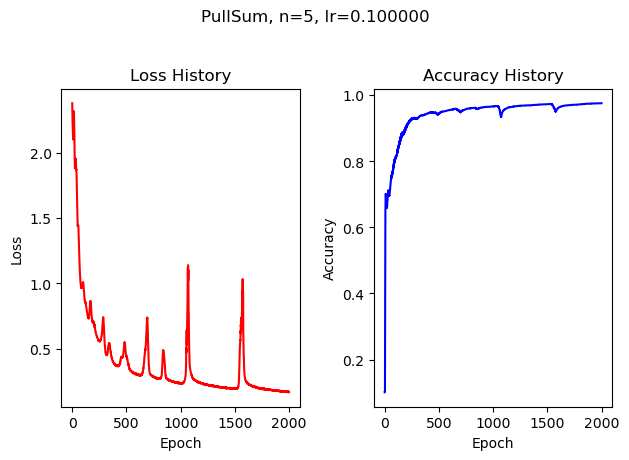

In [8]:
l2,a2=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_4layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=2000,lr=(0.1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

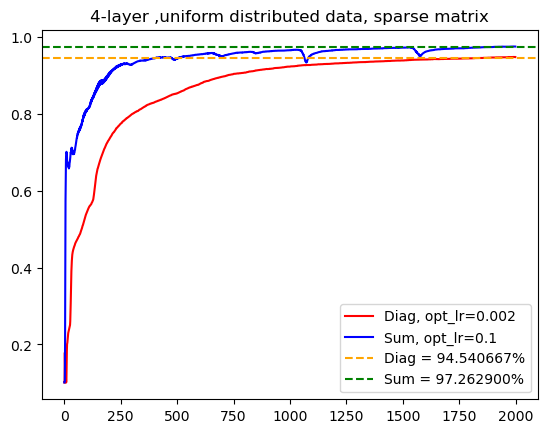

In [14]:
plt.plot(A2,color='r',label='Diag, opt_lr=0.002')
plt.plot(a2,color='b',label='Sum, opt_lr=0.1')
plt.title("4-layer ,uniform distributed data, sparse matrix")
number=np.mean(A2[1700:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a2[1700:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')
plt.legend()
plt.show()

### 大异质性的数据&完全互联矩阵

<font color=red>两层神经网络</font> 

<font color=blue>Pull Diag 最优参数：0.2/5到0.4/5 </font>

<font color=blue>Pull Sum 最优参数：0.7 </font>

此时，收敛速度和正确率上界都差别不大

<font color=red>不过可以看出的是，数据异质性增大后，算法能达到的正确率上界被压低了</font>

In [16]:
n=5
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=R#get_xinmeng_like_matrix(n,seed=85395).T
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

A的第二大特征值: 4.965068306494546e-17
A的beta: 2.0584085788909642e-16
A的spectral gap: 0.9999999999999998
A的kappa: 1.0000000000000007
S_A是: 4.472135954999583 

1.0000e+00, 5.0000e+00


Training Progress:   8%|▊         | 75/1000 [00:01<00:23, 39.82it/s, accuracy=77.6500000000%, epoch=79, loss=2.5242390633]

Training Progress: 100%|██████████| 1000/1000 [00:25<00:00, 39.17it/s, accuracy=87.3300000000%, epoch=1000, loss=0.1646226346]


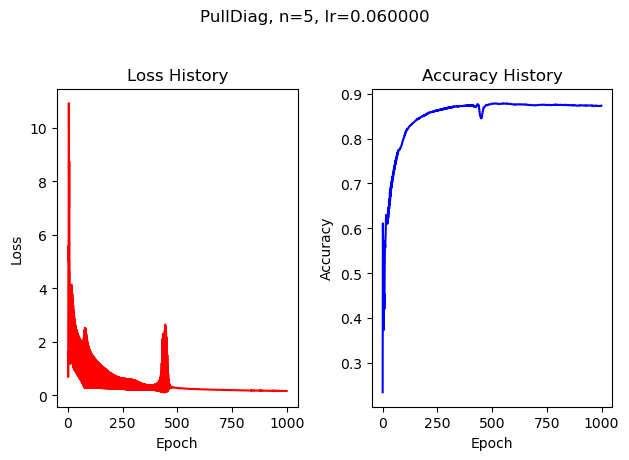

In [29]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1000,lr=(0.3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   1%|          | 10/1000 [00:00<00:24, 40.83it/s, accuracy=51.6600000000%, epoch=11, loss=1.7904799461]

Training Progress: 100%|██████████| 1000/1000 [00:24<00:00, 40.84it/s, accuracy=87.1600000000%, epoch=1000, loss=0.1388569236]


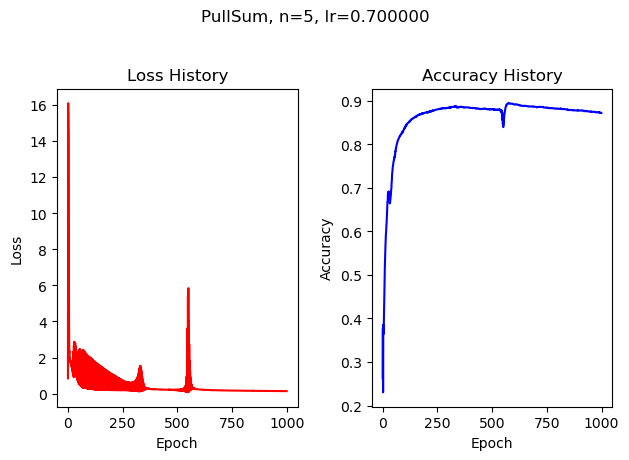

In [41]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1000,lr=(0.7/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

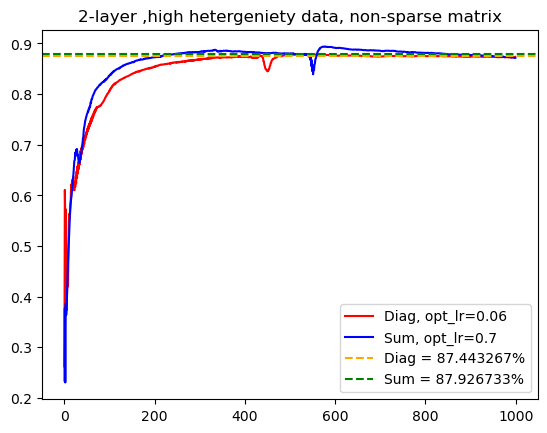

In [45]:
plt.plot(A1,color='r',label='Diag, opt_lr=0.06')
plt.plot(a1,color='b',label='Sum, opt_lr=0.7')
plt.title("2-layer ,high hetergeniety data, non-sparse matrix")
number=np.mean(A1[700:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a1[700:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')
plt.legend()
plt.show()

### 大异质性的数据&稀疏矩阵

<font color=red>两层神经网络</font> 

<font color=blue>Pull Diag 最优参数：1e-3 </font>

<font color=blue>Pull Sum 最优参数：0.09 到 0.11 </font>

收敛速度上，Sum远远快于Diag

正确率上界上，Sum也更好

In [67]:
n=5
a=0.996
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A=get_xinmeng_like_matrix(n,seed=85395).T
A=a*A+(1-a)*I
B=get_B(A=A,u=2*n,n=n)
show_row(A)
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")
h_data,y_data,X_test,y_test=prepare_node_5_hard()

A的第二大特征值: 0.5873611081378232
A的beta: 0.9192604747002416
A的spectral gap: 0.08073952529975836
A的kappa: 1.8348604358048821
S_A是: 89.00945641112506 

1.7882e+00, 5.7410e+05


Training Progress:   0%|          | 25/10000 [00:00<04:12, 39.49it/s, accuracy=11.2200000000%, epoch=27, loss=30.1712234497]

Training Progress: 100%|██████████| 10000/10000 [04:16<00:00, 38.96it/s, accuracy=81.3600000000%, epoch=1e+4, loss=0.6124267220]


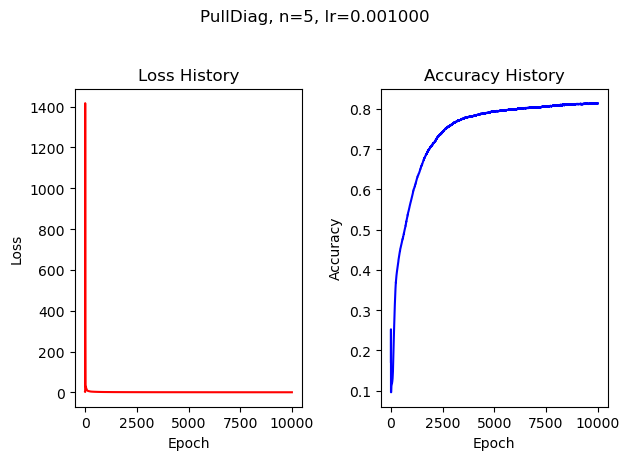

In [71]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=10000,lr=(5e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

Training Progress:   2%|▏         | 23/1500 [00:00<00:36, 40.39it/s, accuracy=44.8100000000%, epoch=25, loss=3.5435377836]

Training Progress: 100%|██████████| 1500/1500 [00:37<00:00, 39.53it/s, accuracy=87.5400000000%, epoch=1500, loss=0.2007020488]


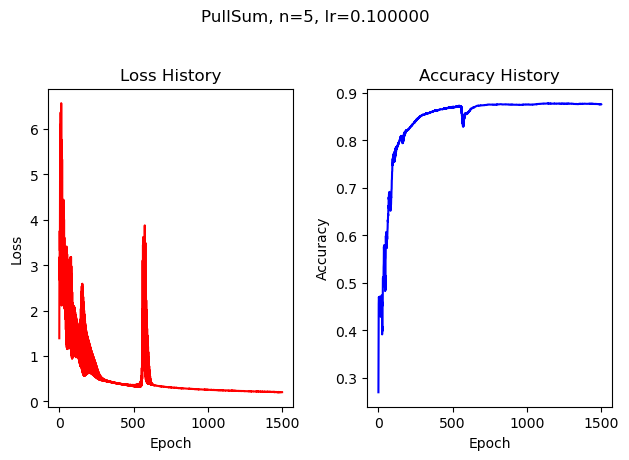

In [90]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(0.1/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_with_average_model)

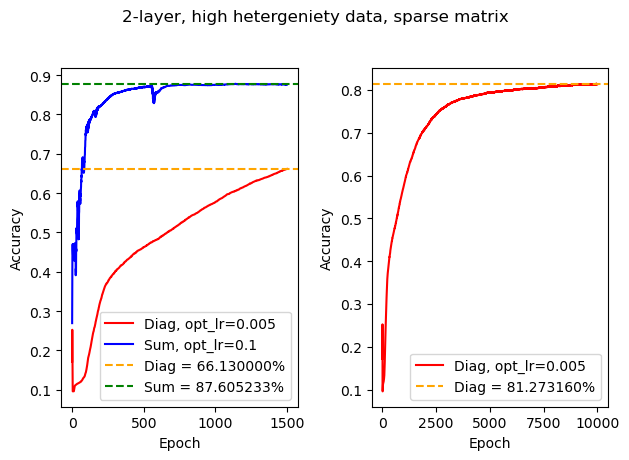

In [96]:
plt.subplot(1, 2, 1)
plt.plot(A1[:1500],color='r',label='Diag, opt_lr=0.005')
plt.plot(a1,color='b',label='Sum, opt_lr=0.1')
number=A1[1500]
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')
number=np.mean(a1[900:])
plt.axhline(y=number, color='green', linestyle='--', label=f'Sum = {100*number:4f}%')    
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(A1,color='r',label='Diag, opt_lr=0.005')
number=np.mean(A1[9000:])
plt.axhline(y=number, color='orange', linestyle='--', label=f'Diag = {100*number:4f}%')   
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle("2-layer, high hetergeniety data, sparse matrix")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()